In [2]:
import chardet

# Detect encoding
with open('article1.txt', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [5]:
with open('article1.txt','r',encoding='utf-8') as file:
    data=file.read()
    print(data)

Among the drunken pygmies of the so-called EU tasked with responding to the challenges and misfortunes of Trumpism, the Estonian Kaja Kallas stands out for her foresight and balance—or so they say. As the “High Representative of Foreign Policy” (just imagine what the low ones might be like), she recently unleashed three pearls of wisdom that showcase pure genius, no less.

“We don’t need one single army but 27 armies to defend ourselves, preferably with allies, but if necessary, alone.” (The fact that there are already 27 armies, costing far more than a unified one, doesn’t seem to trouble her much.)
“Spend more to prevent war, but also to prepare for it.” (A bit like breaking wind to prevent a bad smell while preparing for the worst.) War with Russia, of course—a country supposedly eager to invade Europe, even though it wouldn’t know what to do with it. Russia has always denied such intentions, has only managed to occupy a fifth of Ukraine in three years with great difficulty, and wou

In [9]:
cleaned_data=clean_text(data)
print(cleaned_data)

among drunken pygmies socalled eu tasked responding challenges misfortunes trumpism estonian kaja kallas stands foresight balanceor say high representative foreign policy imagine low ones might like recently unleashed three pearls wisdom showcase pure genius less dont need one single army armies defend preferably allies necessary alone fact already armies costing far unified one doesnt seem trouble much spend prevent war also prepare bit like breaking wind prevent bad smell preparing worst war russia coursea country supposedly eager invade europe even though wouldnt know russia always denied intentions managed occupy fifth ukraine three years great difficulty would face entirety nato tried largest country world covering earths landmass little need territory might need population ranks among least populous countries global population kallas must gotten wind cousin putin desperate invade logic military doctrine convince otherwise lets forget world full erratic politicians kallas grandmot

In [11]:
corpus = sent_tokenize(cleaned_data)  # Each sentence becomes a document
print(corpus)

['among drunken pygmies socalled eu tasked responding challenges misfortunes trumpism estonian kaja kallas stands foresight balanceor say high representative foreign policy imagine low ones might like recently unleashed three pearls wisdom showcase pure genius less dont need one single army armies defend preferably allies necessary alone fact already armies costing far unified one doesnt seem trouble much spend prevent war also prepare bit like breaking wind prevent bad smell preparing worst war russia coursea country supposedly eager invade europe even though wouldnt know russia always denied intentions managed occupy fifth ukraine three years great difficulty would face entirety nato tried largest country world covering earths landmass little need territory might need population ranks among least populous countries global population kallas must gotten wind cousin putin desperate invade logic military doctrine convince otherwise lets forget world full erratic politicians kallas grandm

In [1]:
vectorizer = CountVectorizer(ngram_range=(1, 3))
dtm = vectorizer.fit_transform(corpus)
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())
print(dtm_df)

NameError: name 'CountVectorizer' is not defined

In [1]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
import re

In [2]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['https://scrapsfromtheloft.com/movies/babygirl-2024-transcript/',
        'https://scrapsfromtheloft.com/movies/den-of-thieves-2-pantera-transcript/',
        'https://scrapsfromtheloft.com/movies/star-trek-section-31-transcript/',
        'https://scrapsfromtheloft.com/movies/moana-2-transcript/',
        'https://scrapsfromtheloft.com/movies/all-about-my-mother-1999-transcript/',
        'https://scrapsfromtheloft.com/movies/sonic-the-hedgehog-3-transcript/'
        ]

# movies names
movies = ['babygirl','den-of-thieves-2-pantera','star-trek-section-31','moana-2','all-about-my-mother-1999','sonic-the-hedgehog-3']

In [5]:
transcripts = [url_to_transcript(u) for u in urls]

https://scrapsfromtheloft.com/movies/babygirl-2024-transcript/
https://scrapsfromtheloft.com/movies/den-of-thieves-2-pantera-transcript/
https://scrapsfromtheloft.com/movies/star-trek-section-31-transcript/
https://scrapsfromtheloft.com/movies/moana-2-transcript/
https://scrapsfromtheloft.com/movies/all-about-my-mother-1999-transcript/
https://scrapsfromtheloft.com/movies/sonic-the-hedgehog-3-transcript/


In [7]:
!mkdir transcripts

A subdirectory or file transcripts already exists.


In [9]:
for i, c in enumerate(movies):
     with open("transcripts/" + c + ".txt", "wb") as file:
        pickle.dump(transcripts[i], file)

In [11]:
data = {}
for i, c in enumerate(movies):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [13]:
data.keys()

dict_keys(['babygirl', 'den-of-thieves-2-pantera', 'star-trek-section-31', 'moana-2', 'all-about-my-mother-1999', 'sonic-the-hedgehog-3'])

In [15]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)

    3
    return combined_text

In [17]:
data_combined = {key: [combine_text(value)] for (key, value) in data.items()}

In [19]:
import pandas as pd
pd.set_option('max_colwidth',150)

data_df = pd.DataFrame.from_dict(data_combined).transpose()
data_df.columns = ['transcript']
data_df = data_df.sort_index()
data_df

,transcript
all-about-my-mother-1999,\n\n\n\n\n\n\n\nAll About My Mother (1999) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
babygirl,\n\n\n\n\n\n\n\nBabygirl (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
den-of-thieves-2-pantera,\n\n\n\n\n\n\n\nDen of Thieves 2: Pantera (2025) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
moana-2,\n\n\n\n\n\n\n\nMoana 2 (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...
sonic-the-hedgehog-3,\n\n\n\n\n\n\n\nSonic the Hedgehog 3 (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...
star-trek-section-31,\n\n\n\n\n\n\n\nStar Trek: Section 31 (2025) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...


In [21]:
full_names = ['All About My Mother','Babygirl','Den Of Thieves 2','Moana 2','Sonic TheHedgehog','Star Trek Section 31' ]

data_df['full_name'] = full_names
data_df

,transcript,full_name
all-about-my-mother-1999,\n\n\n\n\n\n\n\nAll About My Mother (1999) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,All About My Mother
babygirl,\n\n\n\n\n\n\n\nBabygirl (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Babygirl
den-of-thieves-2-pantera,\n\n\n\n\n\n\n\nDen of Thieves 2: Pantera (2025) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Den Of Thieves 2
moana-2,\n\n\n\n\n\n\n\nMoana 2 (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Moana 2
sonic-the-hedgehog-3,\n\n\n\n\n\n\n\nSonic the Hedgehog 3 (2024) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...,Sonic TheHedgehog
star-trek-section-31,\n\n\n\n\n\n\n\nStar Trek: Section 31 (2025) | Transcript - Scraps from the loft\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,Star Trek Section 31


In [23]:
data_df.to_pickle("corpus.pkl")

In [19]:
def clean_text(text):
    text=text.lower()
    #yaha hme kisiko kisi ke sath replace nhi krna just delete krna h punctuation
    text=text.translate(str.maketrans('','',string.punctuation))
    #is me ''.join hi use hoga kyuki char me abhi white spaces h already
    text=''.join([char for char in text if not char.isdigit()])
    text=text.replace('\n',' ')
    text=re.sub(r'\s+',' ',text)
    #yaha ye kuch extra ch remove nhi ho rhe the to 
    text = re.sub(r'[’“”—]', '', text)
    tokens=word_tokenize(text)
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]
    #is me ' '.join use hoga kyuki tokeens words h jisko space ke sath jodna h
    cleaned_text=' '.join(tokens)
    return cleaned_text

In [21]:
round12 = lambda x: clean_text(x)

In [23]:
data_clean = pd.DataFrame(data_df.transcript.apply(round12))
data_clean

,transcript
all-about-my-mother-1999,mother transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy trans...
babygirl,babygirl transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy tra...
den-of-thieves-2-pantera,den thieves pantera transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup...
moana-2,moana transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup comedy transc...
sonic-the-hedgehog-3,sonic hedgehog transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup come...
star-trek-section-31,star trek section transcript scraps loft skip content search movies movie reviews movie transcripts tv series tv show transcripts comedy standup c...


In [31]:
data_clean.to_pickle('data_clean.pkl')

In [27]:
cv = CountVectorizer()
data_cv = cv.fit_transform(data_clean.transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = data_clean.index
data_dtm

,abandoned,abandons,abide,abidjan,abilities,able,about,abruptly,absolutely,absorbs,...,zap,zapper,zeph,zephs,zero,zilch,zocalo,zone,zones,zoom
all-about-my-mother-1999,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
babygirl,0,0,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
den-of-thieves-2-pantera,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,2,1
moana-2,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
sonic-the-hedgehog-3,1,3,1,0,1,1,1,1,4,1,...,1,1,0,0,1,1,0,1,0,0
star-trek-section-31,0,0,0,0,0,1,0,0,2,0,...,0,0,37,9,0,0,0,0,0,0


In [29]:
with open("data_dtm.pkl", "wb") as f:
    pickle.dump(data_dtm, f)

In [17]:
file_paths = ['standup1.txt', 'standup2.txt', 'standup3.txt']
documents = []
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
        cleaned_text = clean_text(text)
        documents.append(cleaned_text)

In [23]:
vectorizer = CountVectorizer(min_df=3)
dtm = vectorizer.fit_transform(documents)

# Convert DTM to a DataFrame
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out(), index=[f"Comedian_{i+1}" for i in range(len(documents))])
dtm_df

,actually,ah,air,already,also,always,amazing,america,american,americans,...,wrong,yeah,yearold,years,yes,yet,you,youd,youre,youve
Comedian_1,9,5,1,6,3,15,1,1,4,6,...,3,69,2,29,10,4,2,1,55,6
Comedian_2,5,2,1,3,9,25,4,7,3,1,...,7,15,1,24,8,2,7,3,46,5
Comedian_3,2,1,6,1,3,6,3,1,1,1,...,4,11,1,2,7,2,1,1,11,1


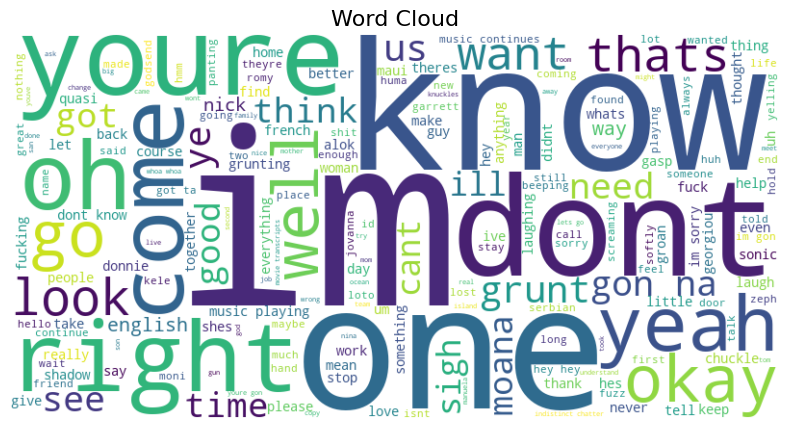

In [37]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text (if using multiple documents)
combined_text = " ".join(data_clean.transcript)  # `documents` is the list of preprocessed articles

# Generate the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(combined_text)

# Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Remove axes
plt.title("Word Cloud", fontsize=16)
plt.show()